<font color='green'>**IMPORT LIBRARIES**</font>

In [1]:
########################################################################################################
# IMPORT LIBRARIES
########################################################################################################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import cov
from scipy.stats import pearsonr
from scipy.stats import spearmanr

<font color='green'>**Read dataset obtained from previous step where semantic scores are calculated**</font>

In [2]:
########################################################################################################
# Read dataset obtained from previous step where semantic scores are calculated
########################################################################################################
toyData=pd.read_csv("Toys_and_Games.csv");

In [3]:
toyData.head(3)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,PreProcessed_reviewText,subjectivity_score,flesch_index,polarity_score,entropy_score,DaleChall_Index,helpful_ratio,lex_diversity
0,439893577,"[1, 1]",4,Love the magnet easel... great for moving to d...,"03 28, 2014",A8R62G708TSCM,love the magnet easel great for moving to diff...,0.65,8.3,0.433333,4.459432,7.588870,0.75,1.000000
1,439893577,"[1, 1]",5,Both sides are magnetic. A real plus when you...,"01 28, 2013",A21KH420DK0ICA,both sides are magnetic a real plus when your...,0.45,29.4,0.333333,5.497670,6.688048,0.20,0.684211
2,439893577,"[0, 0]",5,Bought one a few years ago for my daughter and...,"02 8, 2014",AR29QK6HPFYZ4,bought one a few years ago for my daughter and...,0.45,10.7,0.250000,4.389365,7.461429,0.50,0.741935


<font color='green'>**Make groups of dataset based on distinct values  of column 'overall' and compute average values of each semantic score for each group**</font>

In [4]:
########################################################################################################
# Make groups of dataset based on distinct values  of column 'overall' and compute average values of
# each semantic score for each group
########################################################################################################
groupedData=toyData.groupby(['overall']).mean()
groupedData

,subjectivity_score,flesch_index,polarity_score,entropy_score,DaleChall_Index,helpful_ratio,lex_diversity
overall,,,,,,,
1,0.496235,43.495212,0.019646,5.631696,7.154661,0.618717,0.741960
2,0.500991,49.697695,0.071962,5.773701,7.160521,0.643680,0.722132
3,0.504213,48.623105,0.128070,5.727293,7.204525,0.638250,0.727019
4,0.512541,47.424367,0.183872,5.698653,7.269105,0.642350,0.731439
5,0.529315,33.991421,0.252520,5.350829,7.307210,0.621209,0.779303


<font color='green'>**Add column 'overall' to grouped data**</font>

In [5]:
########################################################################################################
# Add column 'overall' to grouped data
########################################################################################################
groupedData['overall']=[1,2,3,4,5]

<font color='green'>**Visualize line plot on grouped data for 'subjectivity_score' column vs 'overall' column**</font>

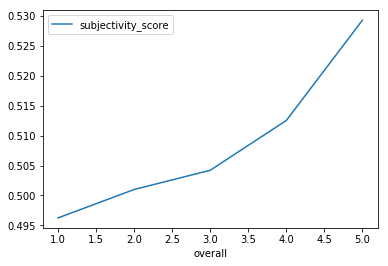

In [6]:
########################################################################################################
# Visualize line plot on grouped data for 'subjectivity_score' column vs 'overall' column
########################################################################################################
lines=groupedData.plot.line(x='overall',y='subjectivity_score')

<font color='green'>**Compute covariance between 'overall' and 'subjectivity_score' columns**</font>

In [7]:
########################################################################################################
# Compute covariance between 'overall' and 'subjectivity_score' columns
########################################################################################################
covariance = cov(toyData['overall'], toyData['subjectivity_score'])
print(covariance)

[[0.99266077 0.01033299]
 [0.01033299 0.01925984]]


<font color='green'>**Compute pearson correlation between 'overall' and 'subjectivity_score' columns**</font>

In [8]:
########################################################################################################
# Compute pearson correlation between 'overall' and 'subjectivity_score' columns
########################################################################################################
corr, _ = pearsonr(toyData['overall'], toyData['subjectivity_score'])
print('Pearsons correlation between rating ans subjectivity score is: %.3f' % corr)

Pearsons correlation between rating ans subjectivity score is: 0.075


<font color='green'>**Compute spearnmans correlation between 'overall' and 'subjectivity_score' columns**</font>

In [9]:
########################################################################################################
# Compute spearnmans correlation between 'overall' and 'subjectivity_score' columns
########################################################################################################
corr, _ = spearmanr(toyData['overall'], toyData['subjectivity_score'])
print('Spearmans correlation between rating ans subjectivity score is: %.3f' % corr)

Spearmans correlation between rating ans subjectivity score is: 0.086


<font color='green'>**Visualize distplot of 'subjectivity_score' column**</font>

C:\Users\adite\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


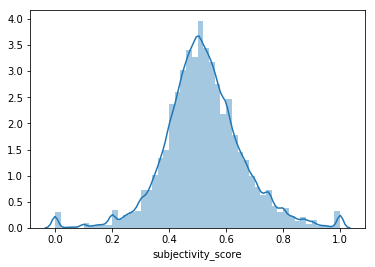

In [10]:
########################################################################################################
# Visualize distplot of 'subjectivity_score' column
########################################################################################################
sns.distplot(toyData.subjectivity_score)
plt.show()

<font color='green'>**Visualize jointplot of 'subjectivity_score' column again 'overall' column**</font>

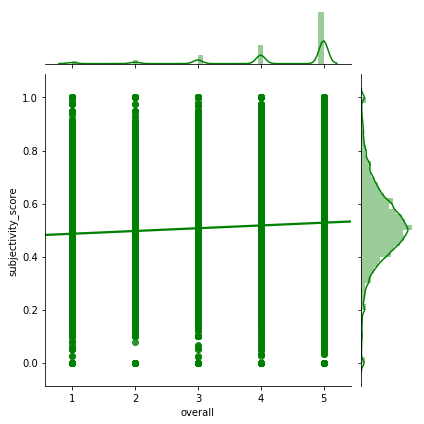

In [11]:
########################################################################################################
# Visualize jointplot of 'subjectivity_score' column again 'overall' column
########################################################################################################
sns.jointplot(data=toyData, x='overall', y='subjectivity_score', kind='reg', color='g')
plt.show()